In [1]:
%%capture
from keras.models import Model, Sequential
from keras.layers import (Dense, Conv2D, BatchNormalization, Input, Reshape, Flatten,
                          Conv2DTranspose, MaxPooling2D, UpSampling2D)

from material.data import mnist_data
from utils import *


class AE():
    def __init__(self):
        self.model, self.encoder, self.decoder = VanillaAutoEncoder()

    def fit(self, x_train, y_train, **kwargs):
        self.model.compile(optimizer="adam", loss="mse")
        self.model.fit(x_train, y_train, **kwargs)

    def encode(self, x_test, **kwargs):
        return self.encoder.predict(x_test, **kwargs)

    def reconstruct(self, x_test, **kwargs):
        return self.model.predict(x_test, **kwargs)


class CAE(AE):
    def __init__(self):
        self.model, self.encoder, self.decoder = ConvolutionalAutoEncoder()


class CAE2(AE):
    def __init__(self):
        self.model, self.encoder, self.decoder = ConvolutionalAutoEncoder()


def ConvolutionalAutoEncoder():
    def conv_encoder():
        # ENCODER
        inp = Input((28, 28, 1))

        e = Conv2D(32, (3, 3), activation='relu')(inp)
        e = MaxPooling2D((2, 2))(e)

        e = Conv2D(64, (3, 3), activation='relu')(e)
        e = MaxPooling2D((2, 2))(e)

        e = Conv2D(64, (3, 3), activation='relu')(e)

        l = Flatten()(e)

        l = Dense(49, activation='softmax')(l)

        return Model(inp, l, name="encoder")

    def conv_decoder():
        # DECODER
        l = Input((49,))
        d = Reshape((7, 7, 1))(l)

        d = Conv2DTranspose(64, (3, 3), strides=2, activation='relu', padding='same')(d)
        d = BatchNormalization()(d)

        d = Conv2DTranspose(64, (3, 3), strides=2, activation='relu', padding='same')(d)
        d = BatchNormalization()(d)

        d = Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(d)
        decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(d)

        return Model(l, decoded, name="decoder")

    encoder = conv_encoder()
    decoder = conv_decoder()
    model = Sequential()
    model.add(encoder)
    model.add(decoder)

    return model, encoder, decoder


def ConvolutionalAutoEncoder2():
    """"
    different decoder as ConvolutionalAutoEncoder

    """
    def conv_encoder():
        # ENCODER
        inp = Input((28, 28, 1))

        e = Conv2D(32, (3, 3), activation='relu')(inp)
        e = MaxPooling2D((2, 2))(e)

        e = Conv2D(64, (3, 3), activation='relu')(e)
        e = MaxPooling2D((2, 2))(e)

        e = Conv2D(64, (3, 3), activation='relu')(e)

        l = Flatten()(e)

        l = Dense(49, activation='softmax')(l)

        return Model(inp, l, name="encoder")

    def conv_decoder():
        # DECODER
        l = Input((49,))
        d = Reshape((7, 7, 1))(l)

        # Decoder
        conv2_1 = Conv2D(8, (3, 3), activation='relu', padding='same')(d)
        up1 = UpSampling2D((2, 2))(conv2_1)
        conv2_2 = Conv2D(8, (3, 3), activation='relu', padding='same')(up1)
        up2 = UpSampling2D((2, 2))(conv2_2)
        decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2)

        return Model(l, decoded, name="decoder")

    encoder = conv_encoder()
    decoder = conv_decoder()
    model = Sequential()
    model.add(encoder)
    model.add(decoder)

    return model, encoder, decoder


def VanillaAutoEncoder():
    x = Input(shape=(784,))
    h = Dense(64, activation='relu')(x)

    x_h = Input(shape=(64,))
    r = Dense(784, activation='sigmoid')(x_h)

    encoder = Model(inputs=x, outputs=h, name="encoder")
    decoder = Model(inputs=x_h, outputs=r, name="decoder")
    model = Sequential()
    model.add(encoder)
    model.add(decoder)

    return model, encoder, decoder


def view_reconstruct(model: AE, x):
    x_r = model.reconstruct(x[:10])
    x = x.reshape((len(x), 28, 28, 1))
    x_r = x_r.reshape((len(x_r), 28, 28, 1))
    show_plot(x, 3)
    show_plot(x_r, 3)


def view_encoding_space(x, y):
    x_visual = x.reshape(len(x), -1)
    y_visual = np.argmax(y, axis=-1)
    plt.figure(figsize=(10, 10))
    t_sne_visualize(x_visual, y_visual, n_sample=500)


(60000, 784)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
(10000, 784)
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


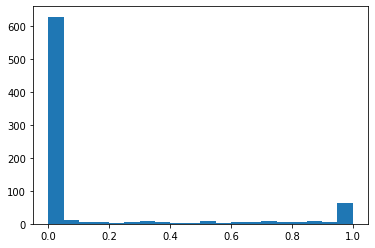

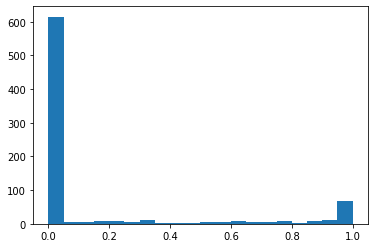

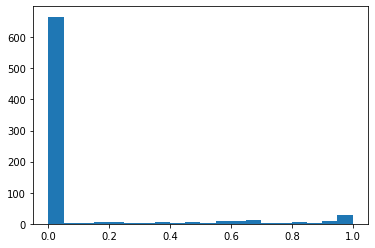

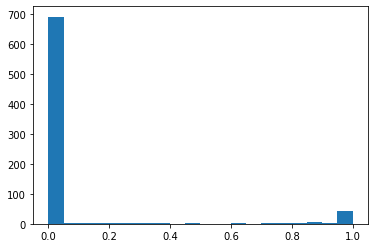

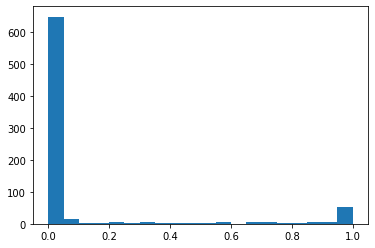

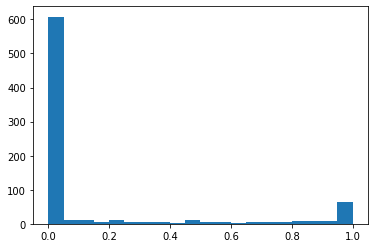

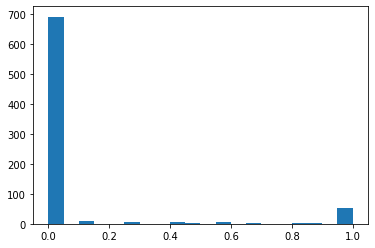

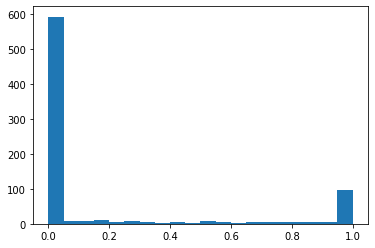

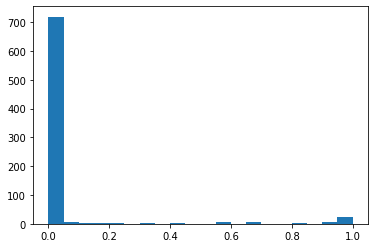

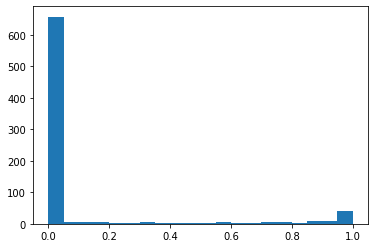

In [3]:
# load data
x_train, y_train, x_test, y_test = mnist_data()

for x in x_train[:10]:
    plt.hist(x, bins=20)
    plt.show()

# Vanilla AE

In [4]:
# load data
x_train, y_train, x_test, y_test = mnist_data()

# train model
model = AE()
# model.model.summary()
model.fit(x_train, x_train, epochs=10, validation_split=0.2)

(60000, 784)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
(10000, 784)
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Epoch 1/10
1500/1500 [==============================] - 3s 1ms/step - loss: 0.0486 - val_loss: 0.0121
Epoch 2/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0100 - val_loss: 0.0066
Epoch 3/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0060 - val_loss: 0.0052
Epoch 4/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0050 - val_loss: 0.0048
Epoch 5/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0046 - val_loss: 0.0046
Epoch 6/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0044 - val_loss: 0.0044
Epoch 7/10
1500/1500 [========

in trainset:


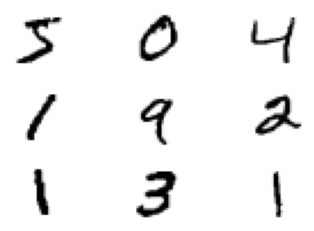

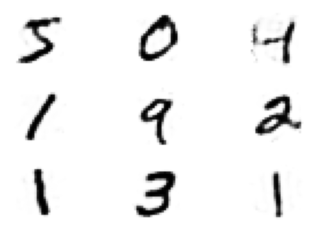

in testset:


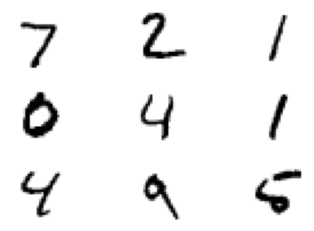

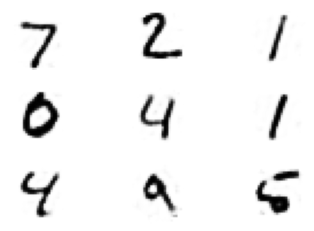

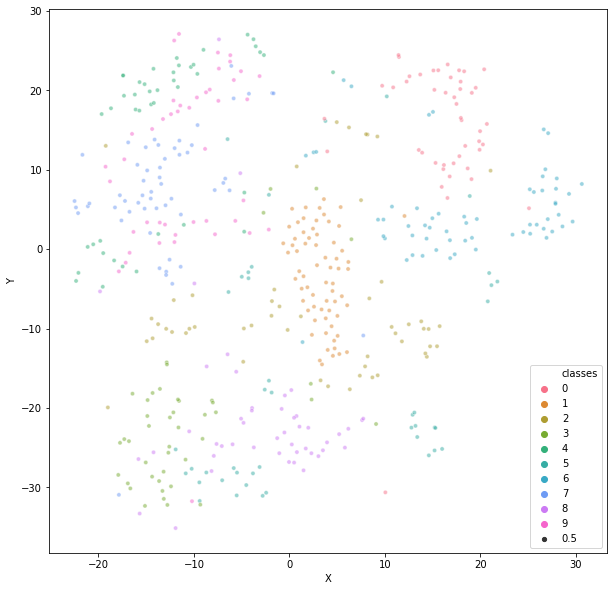

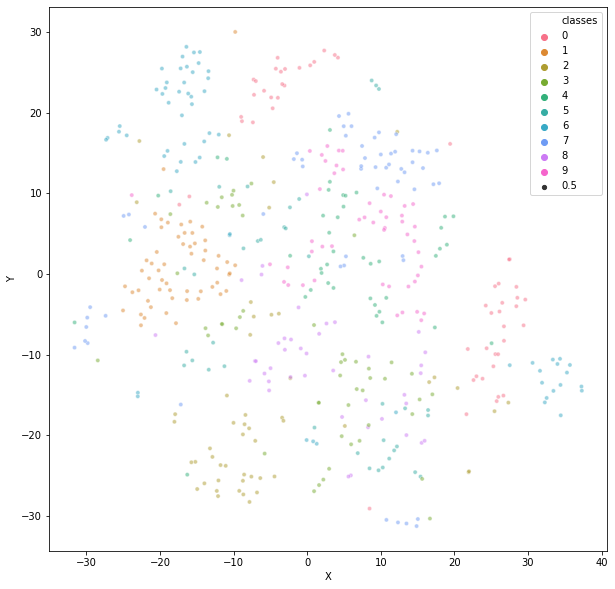

In [6]:
# eval model
print("in trainset:")
view_reconstruct(model, x_train)
print("in testset:")
view_reconstruct(model, x_test)
view_encoding_space(x_train, y_train)
view_encoding_space(model.encode(x_train), y_train)

# Sparse AE

In [ ]:
# load data
x_train, y_train, x_test, y_test = mnist_data()

# train model
model = SAE()
# model.model.summary()
model.fit(x_train, x_train, epochs=10, validation_split=0.2)

In [ ]:
# eval model
print("in trainset:")
view_reconstruct(model, x_train)
print("in testset:")
view_reconstruct(model, x_test)
view_encoding_space(x_train, y_train)
view_encoding_space(model.encode(x_train), y_train)

# CAE

In [12]:
# load data
x_train, y_train, x_test, y_test = mnist_data(as_img=True)

# train model
model = CAE()
# model.model.summary()
model.fit(x_train, x_train, epochs=10, validation_split=0.2)

(60000, 28, 28, 1)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
(10000, 28, 28, 1)
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Epoch 1/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0324 - val_loss: 0.0130
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0108 - val_loss: 0.0095
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0092 - val_loss: 0.0139
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0083 - val_loss: 0.0136
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0079 - val_loss: 0.0090
Epoch 6/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0075 - val_loss: 0.0202
Epoch 7/10
1500/

in trainset:


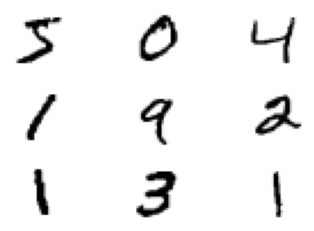

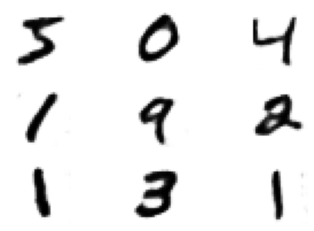

in testset:


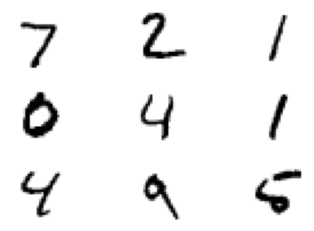

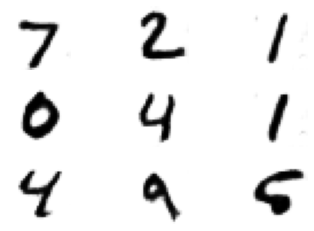

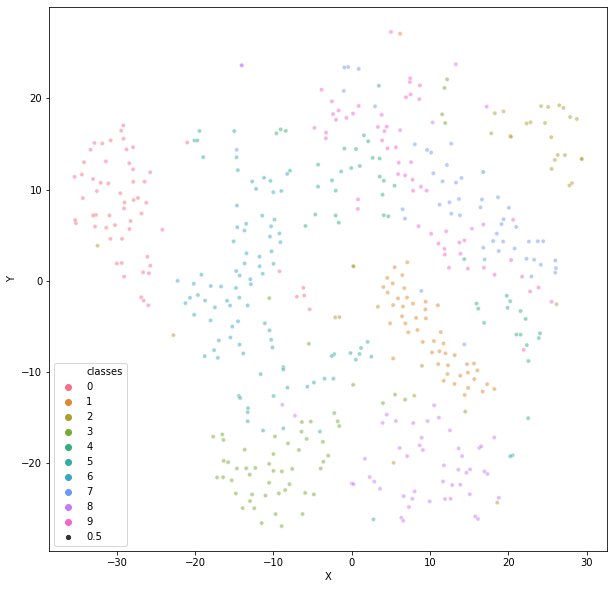

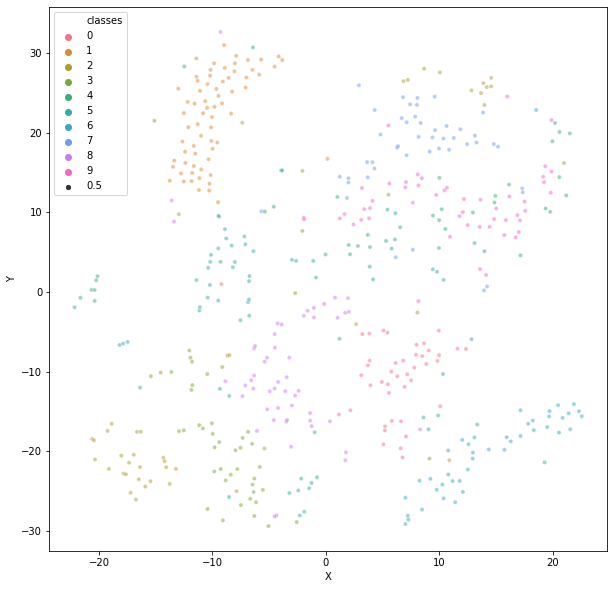

In [13]:
# eval model
print("in trainset:")
view_reconstruct(model, x_train)
print("in testset:")
view_reconstruct(model, x_test)
view_encoding_space(x_train, y_train)
view_encoding_space(model.encode(x_train), y_train)

# CAE2

In [10]:
# load data
x_train, y_train, x_test, y_test = mnist_data(as_img=True)

# train model
model = CAE2()
# model.model.summary()
model.fit(x_train, x_train, epochs=10, validation_split=0.2)

(60000, 28, 28, 1)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
(10000, 28, 28, 1)
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Epoch 1/10
1500/1500 [==============================] - 11s 6ms/step - loss: 0.0271 - val_loss: 0.0191
Epoch 2/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0099 - val_loss: 0.0091
Epoch 3/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0085 - val_loss: 0.0287
Epoch 4/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0079 - val_loss: 0.0513
Epoch 5/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0075 - val_loss: 0.0091
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0072 - val_loss: 0.0081
Epoch 7/10
1500/1

in trainset:


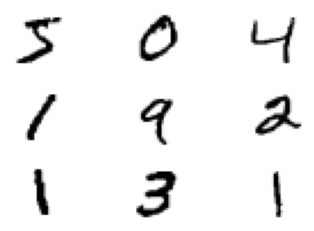

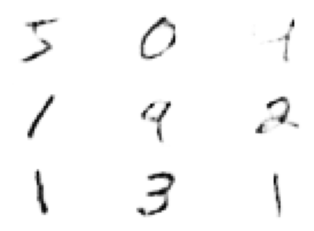

in testset:


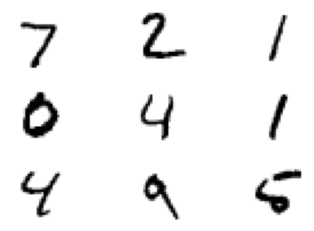

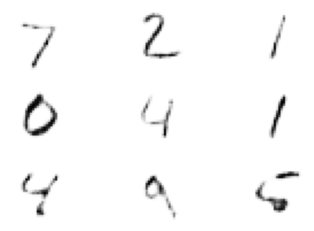

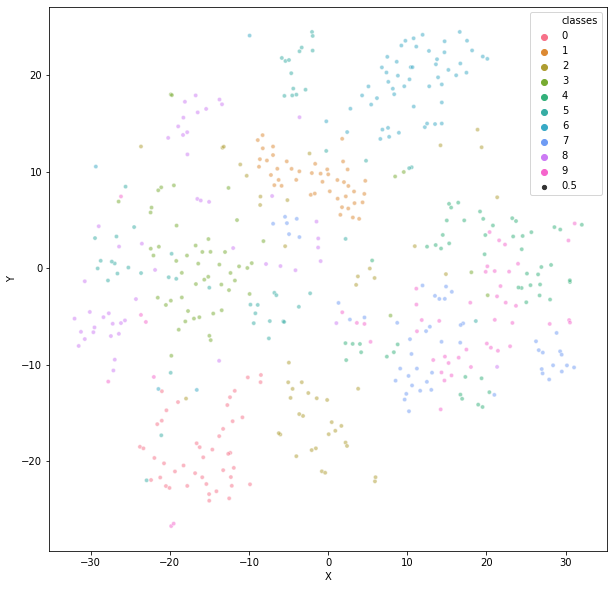

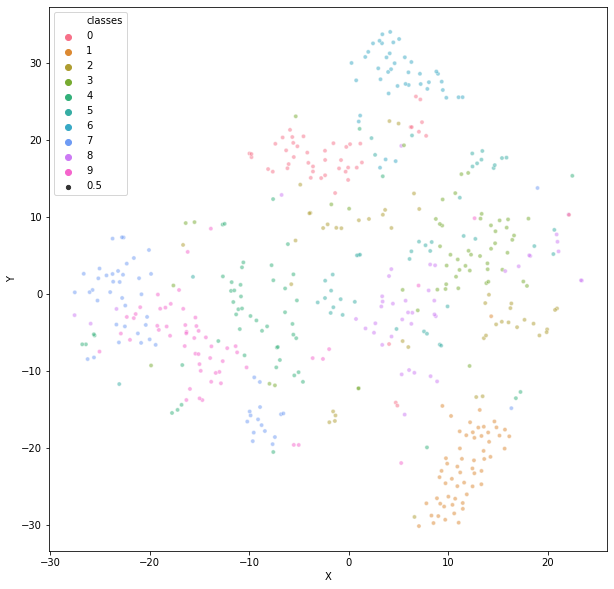

In [11]:
# eval model
print("in trainset:")
view_reconstruct(model, x_train)
print("in testset:")
view_reconstruct(model, x_test)
view_encoding_space(x_train, y_train)
view_encoding_space(model.encode(x_train), y_train)